## Overview<a id='Overview'></a>

In the United States, dog bites are often reported to law enforcement with the concern that the dog may be rabid. Here we are provided with a dataset of approximately 9,000 recorded dog bites occurring between 1985 and 2017 near Louisville, Kentucky. The data includes fields such as dog breed, dog gender, vaccination history, and actions taken (if any) to determine whether the dog was rabid.

In [73]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.proportion import proportions_ztest

In [2]:
bite_data = pd.read_csv('Health_AnimalBites.csv')

In [3]:
bite_data

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
0,1985-05-05 00:00:00,DOG,NaN,FEMALE,LIG. BROWN,1.0,1985-06-20 00:00:00,40229,NO,BODY,1985-05-05 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
1,1986-02-12 00:00:00,DOG,NaN,UNKNOWN,BRO & BLA,NaN,NaN,40218,NO,BODY,1986-02-12 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
2,1987-05-07 00:00:00,DOG,NaN,UNKNOWN,NaN,NaN,NaN,40219,NO,BODY,1990-05-07 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
3,1988-10-02 00:00:00,DOG,NaN,MALE,BLA & BRO,NaN,NaN,NaN,NO,BODY,1990-10-02 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
4,1989-08-29 00:00:00,DOG,NaN,FEMALE,BLK-WHT,NaN,NaN,NaN,NO,BODY,NaN,UNKNOWN,NaN,NaN,UNKNOWN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8998,2017-09-05 00:00:00,DOG,NaN,NaN,NaN,NaN,NaN,40243,NaN,UNKNOWN,NaN,NaN,NaN,NaN,NaN
8999,2017-09-07 00:00:00,DOG,POMERANIAN,MALE,RED,NaN,NaN,40204,NaN,HEAD,NaN,NaN,NaN,NaN,NaN
9000,2017-09-07 00:00:00,DOG,LABRADOR RETRIV,MALE,BROWN,NaN,NaN,47130,NaN,UNKNOWN,NaN,NaN,NaN,NaN,NaN
9001,2017-09-07 00:00:00,DOG,LABRADOR RETRIV,FEMALE,BLK WHT,NaN,NaN,40229,NaN,BODY,NaN,NaN,NaN,NaN,NaN


__Key__:

 - bite_date: The date the bite occurred
 - SpeciesIDDesc: The species of animal that did the biting
 - BreedIDDesc: Breed (if known)
 - GenderIDDesc: Gender (of the animal)
 - color: color of the animal
 - vaccination_yrs: how many years had passed since the last vaccination
 - vaccination_date: the date of the last vaccination
 - victim_zip: the zipcode of the victim
 - AdvIssuedYNDesc: whether advice was issued
 - WhereBittenIDDesc: Where on the body the victim was bitten
 - quarantine_date: whether the animal was quarantined
 - DispositionIDDesc: whether the animal was released from quarantine
 - headsentdate: the date the animal’s head was sent to the lab
 - release_date: the date the animal was released
 - ResultsIDDesc: results from lab tests (for rabies)

## Initial Analysis<a id='Initial Analysis'></a>

Let's take a look at some basic summaries of the data.

In [4]:
bite_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9003 entries, 0 to 9002
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bite_date          8686 non-null   object 
 1   SpeciesIDDesc      8885 non-null   object 
 2   BreedIDDesc        3759 non-null   object 
 3   GenderIDDesc       6477 non-null   object 
 4   color              6426 non-null   object 
 5   vaccination_yrs    3738 non-null   float64
 6   vaccination_date   4115 non-null   object 
 7   victim_zip         7165 non-null   object 
 8   AdvIssuedYNDesc    2565 non-null   object 
 9   WhereBittenIDDesc  8387 non-null   object 
 10  quarantine_date    2020 non-null   object 
 11  DispositionIDDesc  1535 non-null   object 
 12  head_sent_date     395 non-null    object 
 13  release_date       1445 non-null   object 
 14  ResultsIDDesc      1543 non-null   object 
dtypes: float64(1), object(14)
memory usage: 1.0+ MB


In [5]:
bite_data.describe()

,vaccination_yrs
count,3738.000000
mean,1.452113
std,0.848416
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,11.000000


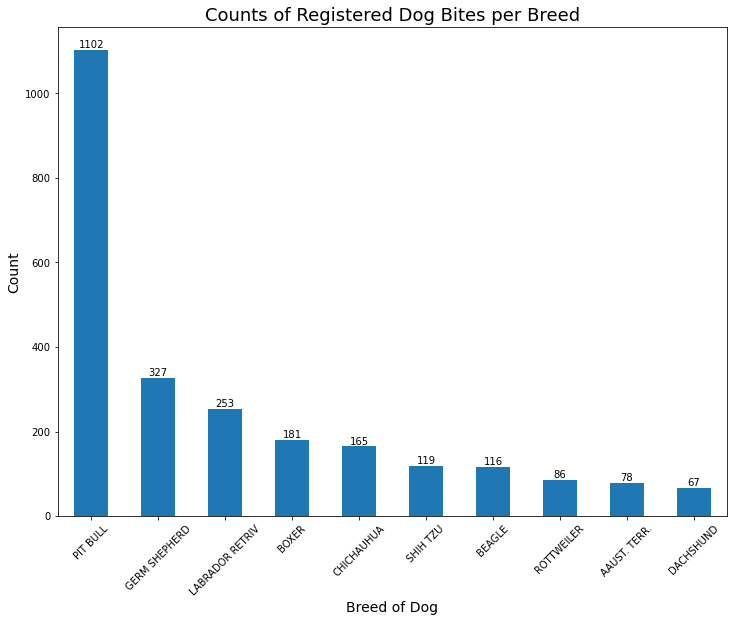

In [13]:
f, ax = plt.subplots(figsize = (12, 9))
bite_data_breed_counts = bite_data['BreedIDDesc'].value_counts()[:10].plot(kind = 'bar')
plt.xlabel('Breed of Dog', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.bar_label(bite_data_breed_counts.containers[0])
plt.title('Counts of Registered Dog Bites per Breed', fontsize = 18)
plt.xticks(rotation = 45)
plt.show()

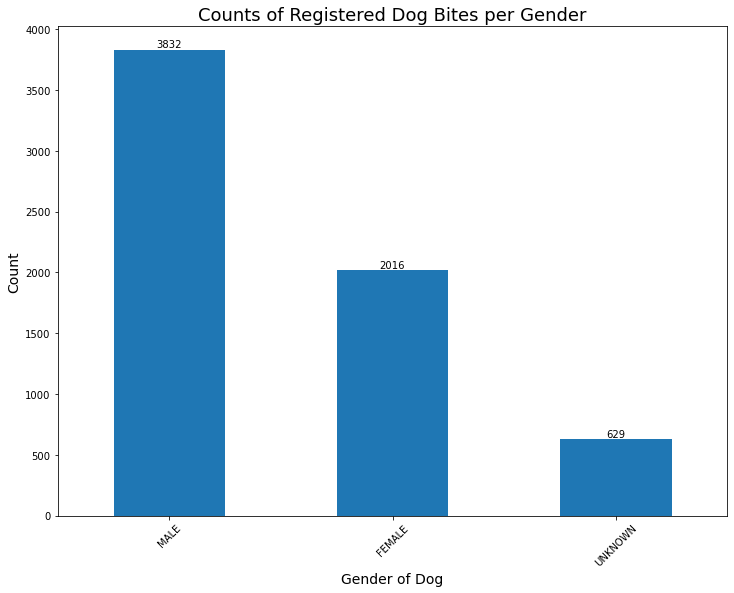

In [14]:
f, ax = plt.subplots(figsize = (12, 9))
bite_data_gender_counts = bite_data['GenderIDDesc'].value_counts().plot(kind = 'bar')
plt.xlabel('Gender of Dog', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.bar_label(bite_data_gender_counts.containers[0])
plt.title('Counts of Registered Dog Bites per Gender', fontsize = 18)
plt.xticks(rotation = 45)
plt.show()

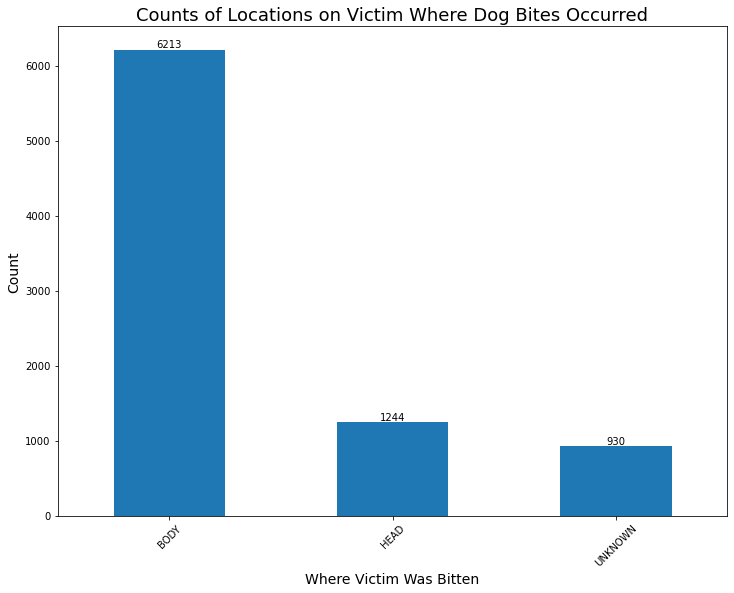

In [15]:
f, ax = plt.subplots(figsize = (12, 9))
bite_data_wherebitten_counts = bite_data['WhereBittenIDDesc'].value_counts().plot(kind = 'bar')
plt.xlabel('Where Victim Was Bitten', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.bar_label(bite_data_wherebitten_counts.containers[0])
plt.title('Counts of Locations on Victim Where Dog Bites Occurred', fontsize = 18)
plt.xticks(rotation = 45)
plt.show()

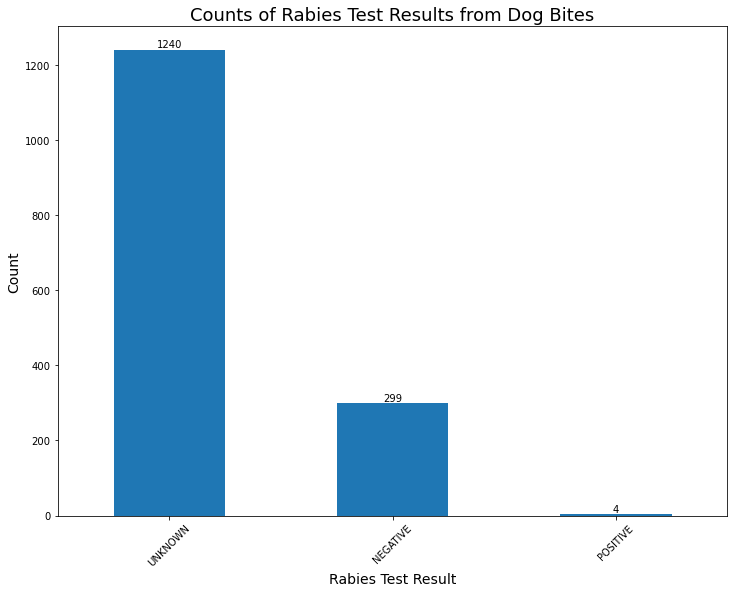

In [16]:
f, ax = plt.subplots(figsize = (12, 9))
bite_data_rabid_counts = bite_data['ResultsIDDesc'].value_counts().plot(kind = 'bar')
plt.xlabel('Rabies Test Result', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.bar_label(bite_data_rabid_counts.containers[0])
plt.title('Counts of Rabies Test Results from Dog Bites', fontsize = 18)
plt.xticks(rotation = 45)
plt.show()

__Things to note__:

 - Most of the features are either dates or categorical. It would be difficult to determine any numerical patterns or correlations from this data.
 - All of the features have a degree of missing data, either with NaN or some other indicator, with some of them missing more data than they actually have. This is of course more expected with real-world data.
 - The feature expected to be the dependent variable, ResultsIDDesc, which provides the result of whether the dog was rabid, is sparsely populated and only contains 4 positive results. This therefore may not be the best feature to use to glean information from the dataset.
 - We see that males tend to bite more than females. This is consistent with what we know about animal gender tendencies in nature.
 - __We see that most bites were done on the body.__ This is likely because the body is easier to reach by a dog than the head. However, given a choice in the situation, would a dog prefer to bite at the head? That is, if a dog is more able (taller or more powerful back legs, for example), to bite at the head, will it deliberately do so, implying it is more aggressive?
 - __We see that pit bulls have a much higher count as the breed of dog than any other dog.__ In the United States, pit bulls have a reputation for being more aggressive than most other breeds of household dogs - it is a point of contention whether they should be allowed as pets.

## In-Depth Analysis<a id='In-Depth Analysis'></a>

Based on the state of the data we have been provided, we could attempt to determine more insight into the aggression of pit bulls, by determining if they are responsible for significantly more bites than other breeds, and in what ways.

We first isolate the few features that would be useful for this analysis. We then clean up these features, primarily by standardizing their placeholders for missing values, and then exclude any records with missing values.

In [85]:
bite_data_cleaned = bite_data[['BreedIDDesc', 'GenderIDDesc', 'WhereBittenIDDesc']]
bite_data_cleaned['BreedIDDesc'] = bite_data_cleaned['BreedIDDesc'].replace(np.nan, 'OTHER')
bite_data_cleaned['GenderIDDesc'] = bite_data_cleaned['GenderIDDesc'].replace(np.nan, 'UNKNOWN')
bite_data_cleaned['WhereBittenIDDesc'] = bite_data_cleaned['WhereBittenIDDesc'].replace(np.nan, 'UNKNOWN')
bite_data_cleaned = bite_data_cleaned[(bite_data_cleaned['BreedIDDesc'] != 'OTHER') & (bite_data_cleaned['GenderIDDesc'] != 'UNKNOWN') & (bite_data_cleaned['WhereBittenIDDesc'] != 'UNKNOWN')]

C:\Users\Dan\AppData\Local\Temp\ipykernel_16400\4111978193.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bite_data_cleaned['BreedIDDesc'] = bite_data_cleaned['BreedIDDesc'].replace(np.nan, 'OTHER')
C:\Users\Dan\AppData\Local\Temp\ipykernel_16400\4111978193.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bite_data_cleaned['GenderIDDesc'] = bite_data_cleaned['GenderIDDesc'].replace(np.nan, 'UNKNOWN')
C:\Users\Dan\AppData\Local\Temp\ipykernel_16400\4111978193.py:4: SettingWithCopyWarning: 
A value is

In [86]:
bite_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2588 entries, 1202 to 9001
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   BreedIDDesc        2588 non-null   object
 1   GenderIDDesc       2588 non-null   object
 2   WhereBittenIDDesc  2588 non-null   object
dtypes: object(3)
memory usage: 80.9+ KB


__Question #1__: How do the number of attacks from pit bulls compare to those from any other breed?

In [64]:
pit_bull_attacks = bite_data_cleaned[bite_data_cleaned['BreedIDDesc'] == 'PIT BULL']
second_highest_attacks = bite_data_cleaned[bite_data_cleaned['BreedIDDesc'] == bite_data_cleaned['BreedIDDesc'].value_counts().index[1]]
print('Proportion of bites that were from pit bulls: ' + str(round(len(pit_bull_attacks) / len(bite_data_cleaned), 4)))
print('Proportion of bites that were from the breed with the second highest count: ' + str(round(len(second_highest_attacks) / len(bite_data_cleaned), 4)))

Proportion of bites that were from pit bulls: 0.2848
Proportion of bites that were from the breed with the second highest count: 0.0869


Here we see that pit bulls make up 28.5% of the recorded dog bites (with known breed), while the breed with the second largest proportion of bites in the list, German Shepherds, only make up 8.7%. This is a flat difference of nearly 20%. Pit bulls almost certainly bite significantly more often than the other breeds... but we can verify this with some quick statistical tests.

In [125]:
all_breeds_prop_attacks = len(bite_data_cleaned['BreedIDDesc'].unique()) / len(bite_data_cleaned)

print('Under the null assumption that each breed delivers the same number of bites, the expected proportion of all bites that each breed would deliver is ' + str(round(all_breeds_prop_attacks, 4)) + '. Below are the breeds that surpass this:\n')
for i in range(len(bite_data_cleaned['BreedIDDesc'].value_counts())):
    breed_attacks = bite_data_cleaned[bite_data_cleaned['BreedIDDesc'] == bite_data_cleaned['BreedIDDesc'].value_counts().index[i]]
    breed_attacks_prop = len(breed_attacks) / len(bite_data_cleaned)
    if breed_attacks_prop < all_breeds_prop_attacks:
        break
    print('Proportion of bites that were from ' + bite_data_cleaned['BreedIDDesc'].value_counts().index[i] + ': ' + str(round(len(breed_attacks) / len(bite_data_cleaned), 4)))


Under the null assumption that each breed delivers the same number of bites, the expected proportion of all bites that each breed would deliver is 0.0379. Below are the breeds that surpass this:

Proportion of bites that were from PIT BULL: 0.2848
Proportion of bites that were from GERM SHEPHERD: 0.0869
Proportion of bites that were from LABRADOR RETRIV: 0.0653
Proportion of bites that were from BOXER: 0.0522
Proportion of bites that were from CHICHAUHUA: 0.046


Here we set the null assumption that all breeds bite equally, and therefore have the same proportion of bites within this sample. Dividing the total number of recorded breeds by the total number of bites, we obtain an expected percentage of 3.8%. Out of 98 breeds in this dataset, only 5 surpass this percentage, and with the percentage of pit bull bites surpassing it by nearly 25%, it is clear that pit bull bites are heavily skewing the percentage upward.

In [132]:
alpha = .01

print('1-proportion z-test results for if the breed bites significantly more often than expected:\n')
for i in range(len(bite_data_cleaned['BreedIDDesc'].value_counts())):
    breed_attacks = bite_data_cleaned[bite_data_cleaned['BreedIDDesc'] == bite_data_cleaned['BreedIDDesc'].value_counts().index[i]]
    breed_attacks_prop = len(breed_attacks) / len(bite_data_cleaned)
    if breed_attacks_prop < all_breeds_prop_attacks:
        break
    stat_breed, pval_breed = proportions_ztest(len(breed_attacks), len(bite_data_cleaned), value = all_breeds_prop_attacks, alternative = 'larger')
    if pval_breed < alpha:
        print('For ' + bite_data_cleaned['BreedIDDesc'].value_counts().index[i] + ': The z-score is ' + str(round(stat_breed, 4)) + ' and the p-value is ' + str(round(pval_breed, 6)) + '. With a significance level of ' + str(alpha) + ', the breed DOES bite significantly more often than the expected proportion of ' + str(round(all_breeds_prop_attacks, 4)) + '.')
    else:
        print('For ' + bite_data_cleaned['BreedIDDesc'].value_counts().index[i] + ': The z-score is ' + str(round(stat_breed, 4)) + ' and the p-value is ' + str(round(pval_breed, 6)) + '. With a significance level of ' + str(alpha) + ', the breed does NOT bite significantly more often than the expected proportion of ' + str(round(all_breeds_prop_attacks, 4)) + '.')

1-proportion z-test results for if the breed bites significantly more often than expected:

For PIT BULL: The z-score is 27.8321 and the p-value is 0.0. With a significance level of 0.01, the breed DOES bite significantly more often than the expected proportion of 0.0379.
For GERM SHEPHERD: The z-score is 8.8606 and the p-value is 0.0. With a significance level of 0.01, the breed DOES bite significantly more often than the expected proportion of 0.0379.
For LABRADOR RETRIV: The z-score is 5.6491 and the p-value is 0.0. With a significance level of 0.01, the breed DOES bite significantly more often than the expected proportion of 0.0379.
For BOXER: The z-score is 3.2709 and the p-value is 0.000536. With a significance level of 0.01, the breed DOES bite significantly more often than the expected proportion of 0.0379.
For CHICHAUHUA: The z-score is 1.9709 and the p-value is 0.024367. With a significance level of 0.01, the breed does NOT bite significantly more often than the expected prop

Here we run 1-proportion z-tests against the null hypothesis that each of these higher-than-average percentages are _significantly_ higher than the expected percentage. To ensure some sturdiness, we select a significance level of .01. With these assumptions, 4 out of 5 of the breeds (excluding the one with the lowest percentage, Chihuahuas) do seem to bite significantly higher than average.

In [131]:
stat_pit_vs_gs, pval_pit_vs_gs = proportions_ztest([len(pit_bull_attacks), len(second_highest_attacks)], [len(bite_data_cleaned), len(bite_data_cleaned)], alternative = 'two-sided')
print('2-proportion z-test statistic for whether pit bulls bite more often than do the second bitiest breed (German shephards): ' + str(round(stat_pit_vs_gs, 4)))
print('2-proportion z-test p-value for whether pit bulls bite more often than do the second bitiest breed (German shephards): ' + str(round(pval_pit_vs_gs, 6)))

2-proportion z-test statistic for whether pit bulls bite more often than do the second bitiest breed (German shephards): 18.295
2-proportion z-test p-value for whether pit bulls bite more often than do the second bitiest breed (German shephards): 0.0


Finally, we run a 2-proportion z-test to check if the percentages of the two highest breeds, pit bulls and German Shepherds, are different, with the same significance level of .01. With a p-value of nearly 0, we find that the percentage for pit bulls is indeed significantly higher than that of the breed with the second-highest percentage, and therefore all other breeds.

__Question #2__: Do pit bulls attack the head significantly more often than other breeds, suggesting they are more deliberate in their aggression?

In [70]:
pit_bull_attacks_head = pit_bull_attacks[pit_bull_attacks['WhereBittenIDDesc'] == 'HEAD']

other_breed_attacks = bite_data_cleaned[bite_data_cleaned['BreedIDDesc'] != 'PIT BULL']
other_breed_attacks_head = other_breed_attacks[other_breed_attacks['WhereBittenIDDesc'] == 'HEAD']

print('Proportion of pit bull bites that were on the head: ' + str(round(len(pit_bull_attacks_head) / len(pit_bull_attacks), 4)))
print('Proportion of pit bull bites that were NOT on the head: ' + str(1 - round(len(pit_bull_attacks_head) / len(pit_bull_attacks), 4)))
print('Proportion of other breed bites that were on the head: ' + str(round(len(other_breed_attacks_head) / len(other_breed_attacks), 4)))

Proportion of pit bull bites that were on the head: 0.156
Proportion of pit bull bites that were NOT on the head: 0.844
Proportion of other breed bites that were on the head: 0.2312


In [83]:
stat_head, pval_head = proportions_ztest([len(pit_bull_attacks_head), len(other_breed_attacks_head)], [len(pit_bull_attacks), len(other_breed_attacks)], alternative = 'two-sided')
print('2-proportion z-test statistic for whether the proportion of pit bull bites on the head differs from that of other breed bites on the head: ' + str(round(stat_head, 4)))
print('2-proportion z-test p-value for whether the proportion of pit bull bites on the head differs from that of other breed bites on the head: ' + str(round(pval_head, 6)))

2-proportion z-test statistic for whether the proportion of pit bull bites on the head differs from that of other breed bites on the head: -4.2396
2-proportion z-test p-value for whether the proportion of pit bull bites on the head differs from that of other breed bites on the head: 2.2e-05


Here we get some interesting results. The flat percentage of attacks to the head out of all pit bull attacks is 15.6%, but the percentage for all other breeds combined is 23.1%, meaning that not only are pit bull bites to the head _not_ significantly higher than those from other breeds, but also they occur _less_ often. The subsequent 2-proportion z-test allows us to conclude that, assuming a significance of .01, the difference is in fact significant, and therefore the percentage of pit bull attacks to the head is significantly _lower_ than those from other breeds. 

__Question #3__: Do pit bull males attack more often than females, and do they attack more often than males of other breeds?

In [71]:
pit_bull_attacks_male = pit_bull_attacks[pit_bull_attacks['GenderIDDesc'] == 'MALE']

other_breed_attacks_male = other_breed_attacks[other_breed_attacks['GenderIDDesc'] == 'MALE']

print('Proportion of pit bull bites that were from males: ' + str(round(len(pit_bull_attacks_male) / len(pit_bull_attacks), 4)))
print('Proportion of pit bull bites that were NOT from males: ' + str(1 - round(len(pit_bull_attacks_male) / len(pit_bull_attacks), 4)))
print('Proportion of other breed bites that were from males: ' + str(round(len(other_breed_attacks_male) / len(other_breed_attacks), 4)))

Proportion of pit bull bites that were from males: 0.6431
Proportion of pit bull bites that were NOT from males: 0.3569
Proportion of other breed bites that were from males: 0.7007


In [84]:
stat_male, pval_male = proportions_ztest([len(pit_bull_attacks_male), len(other_breed_attacks_male)], [len(pit_bull_attacks), len(other_breed_attacks)], alternative = 'two-sided')
print('2-proportion z-test statistic for whether the proportion of pit bull bites from males differs from that of other breed bites from males: ' + str(round(stat_male, 4)))
print('2-proportion z-test p-value for whether the proportion of pit bull bites from males differs from that of other breed bites from males: ' + str(round(pval_male, 6)))

2-proportion z-test statistic for whether the proportion of pit bull bites from males differs from that of other breed bites from males: -2.843
2-proportion z-test p-value for whether the proportion of pit bull bites from males differs from that of other breed bites from males: 0.004469


We once again get some interesting results. The flat percentage of pit bull attacks from males is 64.3%, so they clearly attack more often than females. However, the flat percentage of attacks done by males of other breeds is 70.1%, again higher than that of pit bulls and the opposite trend of what the question expected. The subsequent 2-proportion z-test allows us to conclude that, assuming a significance level of .01, the difference is in fact significant, and therefore the percentage of pit bull attacks from males is significantly _lower_ than those from males of other breeds. 

## Conclusion<a id='Conclusion'></a>

__(Potential) takeaways__:

 - Overall, pit bulls seem to attack significantly more often than other breeds. This supports what is commonly said about pit bulls.
 - Pit bulls do not necessarily attack the head significantly more often, and certainly not more often than other breeds. Pit bull males also do not attack significantly more often than males of other breeds. This may suggest that breed is the main determininant of whether the dog attacks, and is not correlated with or amplified by other traits.
 - Pit bull males in fact attack significantly less often than males of other breeds. But this also means that pit bull females attack significantly more often than females of other breeds. This further supports the previous point.

__(Potential) next steps__:

 - Obtain more records that don't have missing data in the features we deemed important. Nearly 75% of the records were cut because at least one of their features was missing data.
 - Obtain more records that have data on rabies test results, including positive results. It was determined too difficult to use this data to find correlation with rabies because there were too few records with a test result of either kind. This could have led to a much more in-depth analysis of pit bull aggression or the exploration of a number of other topics.
 - Obtain more features relevant to the attacks if possible. Once again, this could allow for a more in-depth analysis of pit bull aggression, since we could potentially apply regression analysis instead of simply analyzing proportions in single fields.